# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

##  Задача:
Научиться определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных:
* первые вписаны пользователем
* вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Описание данных

# <a name="contents">Содержание</a>
## [1. Ознакомление с данными и их предобработка](#stage_1)
- общая информация
- поиск пропущенных значений, аномалий
- предобработка данных
- добавляем необходимые параметры для объявлений
        

## [2. Исследовательский анализ данных](#stage_2)
- средние показатели для 10 населенных пунктов
- основные параметры недвижимости
- изучение выбросов


## [3. Исследовательский анализ данных г. Санкт - Петербург. Построение модели линейной регрессии.](#stage_3)
- исследовательский анализ данных
- заполнение пропущенных значений
- выделение дополнительных сегментов для г. СПб
- построение модели ланейной регресии для г. СПб
    
    
## [4. Результаты исследования](#stage_4)
- результаты
- выводы
    
    

<a name="stage_1"></a>
# 1. Ознакомление с данными и их предобработка.


[Наверх к оглавлению](#contents)

## Общая информация.

In [88]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', rc={'figure.figsize':(16, 8)})

import scipy.stats as st
import statsmodels.api as sm

from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.simplefilter('ignore')

In [89]:
path = '/datasets/real_estate_data.csv'
df = pd.read_csv(path, sep='\t', parse_dates=['first_day_exposition'])

In [90]:
# посмотрим на имеющиеся данные
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

* `is_apartment` - имеет некорректный тип данных, если получится заполнить пропуски, исправим на bool.
    
    Имеются пропуска, в нижеперечисленных колонках. После очистки данных от аномалий и выбросов, мы попробуем заполнить пропуски.
* `ceiling_height`
* `floors_total`
* `living_area`
* `is_apartment`
* `kitchen_area`
* `balcony`
* `balcony`
* `locality_name`        
* `airports_nearest`
* `cityCenters_nearest`   
* `parks_around3000`
* `parks_nearest`         
* `ponds_around3000`      
* `ponds_nearest`         
* `days_exposition`

    Строки с отсутствующим значением `locality_name` сразу лучше удалить. Т.к. это основополагающая информация для любого объявления. Посмотрим на количество таких строк и примем решение.

In [92]:
# проверим данные на дубликаты
df.duplicated().sum()

0

# Проведем поиск аномалий в данных

In [93]:
# посмотрим на описательную статистику строковых колонок
df[['locality_name', 'is_apartment']].describe()

,locality_name,is_apartment
count,23650,2775
unique,364,2
top,Санкт-Петербург,False
freq,15721,2725


* `is_apartment` - почти все значения пропущенны, в разделе по заполнению пропусков попробуем это проанализировать.

In [94]:
# посмотрим на описательную статистику числовых колонок
df.describe(percentiles=[0.05,0.25,0.5,0.75,0.95]).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,1.0,6.00,9.00,14.0,20.00,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,1870000.0,3400000.00,4650000.00,6800000.0,15300000.00,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,31.0,40.00,52.00,69.9,116.00,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.0,1.00,2.00,3.0,4.00,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.5,2.52,2.65,2.8,3.30,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,4.0,5.00,9.00,16.0,25.00,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,15.2,18.60,30.00,42.3,69.00,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,1.0,2.00,4.00,8.0,16.00,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,5.5,7.00,9.10,12.0,20.00,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.0,0.00,1.00,2.0,2.00,5.0


* `total_images` - есть объявления без фотографий
* `last_price` - большая часть объявлений стоит более 1млн.руб., переведем значения из руб. в тыс.руб. Похоже, что присутствуют выбросы.
* `rooms` - нужно проверить 0 значения. Похоже, что присутствуют выбросы.
* `ceiling_height` - по строительным нормам (СНиП) высота потолков должна быть от 2,4м, все что ниже - ошибки. Максимальные значения 100м тоже являются ошибочными.
* `living_area` - минимальные значения от 2м2 - это явная ошибка. Похоже, что присутствуют выбросы.
* `kitchen_area` - минимальные значения от 1,3, это явная ошибка. Похоже, что присутствуют выбросы.
* `airports_nearest` - 0 значения это явно ошибка, нужно проверить остальные значения.
* `airports_nearest`, `cityCenters_nearest` - изменить единицы измерения с м на км
* `cityCenters_nearest` - привести название к нижнему регистру

# Проведем предобработку данных

### locality_name

In [95]:
df['locality_name'].isna().sum()

49

In [96]:
# Т.к. строк немного, удалим информацию об объявлениях с отсутствующей информацией о населенном пункте
df = df.dropna(subset=['locality_name'])

### is_apartment

In [97]:
df['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

In [98]:
df['is_apartment'].value_counts(normalize=True)

False    0.981884
True     0.018116
Name: is_apartment, dtype: float64

    Процент аппартаментов, от общего количества об.явлений похож на правду. Но пропущенные значения мы заполнить никак не сможем. Оставим как есть.

### total_images

In [99]:
# посмотрим на количество объявлений без фотографий
df.query("total_images == 0").total_images.count()

1058

In [100]:
df.query("total_images == 0").total_images.count() / df.shape[0] * 100

4.473572938689218

   4.5% объявлений не имеет фотографий. Это большая часть наших данных, но такое вполне возможно. Так что оставим как есть. 

### last_price

In [101]:
# исправим ед.изм. в стоимости квартиры на тыс.руб
# исправим тип данных
df.last_price = df.last_price.div(1000).astype('int')

### rooms

In [102]:
# посмотрим на количество объявлений с количеством комнат 0
df[df.rooms == 0].shape[0]

197

In [103]:
# посчитаем сколько у нас студий и открытых планировок с таким количеством комнат
df[df.rooms == 0][['studio', 'open_plan']].sum()

studio       138
open_plan     59
dtype: int64

In [104]:
# все сходится
138+59

197

### ceiling_height

In [105]:
# посмотрим на количество объявлений с ошибкой в заполнии высоты потолка
df[(df.ceiling_height < 2.4) | (df.ceiling_height > 4)].ceiling_height.count()

96

In [106]:
index_to_drop = df[(df.ceiling_height < 2.4) | (df.ceiling_height > 4)].index

In [107]:
# создадим столбец с очищенными данными
df['ceiling_height_clear'] = df['ceiling_height'].drop(index = index_to_drop).round(2)

### living_area

In [108]:
# посмотрим на количество объявлений, с ошибкой заполнения в столбце с жилой площадью
# в качестве минимального значения возьмем 6м2 в соответствии с Жилищным Кодексом РФ
df[df.living_area < 6]['living_area'].count()

6

In [109]:
# посмотрим на общую площадь таких квартир
df[df.living_area < 6]['total_area'].describe()

count      6.000000
mean      59.100000
std       44.235506
min       22.000000
25%       27.500000
50%       46.500000
75%       71.200000
max      139.000000
Name: total_area, dtype: float64

    Убеждаемся, что в данных ошибка

In [110]:
# создадим столбец с очищенными данными
index_to_drop = df[df.living_area < 6].index
df['living_area_clear'] = df['living_area'].drop(index = index_to_drop)

### kitchen_area

In [111]:
# посмотрим на количество объявлений, с ошибкой заполнения в столбце с площадью кухни
# в качестве минимального значения возьмем 5м2 в соответствии со СНиП
df[df.kitchen_area < 5]['kitchen_area'].count()

105

In [112]:
# посмотрим на общую площадь таких квартир
df[df.kitchen_area < 5]['total_area'].describe()

count    105.000000
mean      36.614571
std       12.374258
min       14.000000
25%       26.900000
50%       34.000000
75%       43.900000
max       66.400000
Name: total_area, dtype: float64

Убеждаемся, что в данных ошибка

In [113]:
# создадим столбец с очищенными данными
index_to_drop = df[df.kitchen_area < 5].index
df['kitchen_area_clear'] = df['kitchen_area'].drop(index = index_to_drop)

### balcony

In [114]:
# заменим пропуски в столбце с количеством балконов на 0
df.balcony = df.balcony.fillna(0)

### airports_nearest

In [115]:
# посмотрим на количество квартир, расположенных ближе 6000м от аэропорта
# 6км это максимально допустимое расстояние
df[df.airports_nearest < 6000]['airports_nearest'].count()

1

In [116]:
# создадим столбец с очищенными данными
index_to_drop = df[df.airports_nearest < 6000].index
df['airports_nearest_clear'] = df['airports_nearest'].drop(index = index_to_drop)

### airports_nearest, citycenters_nearest

In [117]:
# приведем все названия столбцов к одному регистру
df = df.rename(columns = lambda x: x.lower())

In [118]:
# изменим единицы измерения с м на км
df[['airports_nearest_clear', 'citycenters_nearest']] = df[['airports_nearest', 'citycenters_nearest']].div(1000).round(0)

## Добавим необходимые параметры объявлений для эффективного дальнейшего анализа
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей

In [119]:
# создадим столбец с ценой м2
df['price_per_m2'] = df['last_price'].div(df['total_area']).round(1)

In [120]:
# создадим столбцы с
# днем недели
df['day_name'] = df.first_day_exposition.dt.day_name()

# месяцем
df['month_name'] = df.first_day_exposition.dt.month_name()

# годом
df['year'] = df.first_day_exposition.dt.year

In [121]:
# выделим этаж
def name_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floor == 1:
        return 'первый этаж'
    elif floor == floors_total:
        return 'последний этаж'
    else: return 'не крайний'
    
# применим написанную функцию
df['name_floor'] = df.apply(name_floor, axis = 1)

In [122]:
# создадим столбец с соотношением жилой и общей площади
df['living_area_per_total'] = df['living_area_clear'].div(df['total_area']).round(1)

# создадим столбец с соотношением площади кухни и общей площади
df['kitchen_area_per_total'] = df['kitchen_area_clear'].div(df['total_area']).round(1)

<a name="stage_2"></a>
# 2. Исследовательский анализ данных.


[Наверх к оглавлению](#contents)

## Изучим 10 населённых пунктов с наибольшим числом объявлений

In [123]:
locations_head = df.locality_name.value_counts().head(10)

In [124]:
locations_head

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [125]:
# Создадим сводную таблицу с медианными значениями основных параметров квартиры
df \
    .query('locality_name in @locations_head.index') \
    .pivot_table(index = 'locality_name',
                 values = ['last_price', 'price_per_m2', 'total_area'],
                aggfunc = 'median') \
    .join(locations_head) \
    .rename(columns={'locality_name':'count'}) \
    .sort_values(by='last_price', ascending=False)

,last_price,price_per_m2,total_area,count
locality_name,,,,
Санкт-Петербург,5500,104.80,55.000,15721
Пушкин,5180,100.00,53.200,369
посёлок Парголово,4100,91.60,43.000,327
посёлок Шушары,3950,76.85,50.100,440
деревня Кудрово,3790,91.90,39.900,299
Колпино,3600,74.70,50.000,338
Всеволожск,3450,65.80,53.550,398
посёлок Мурино,3400,85.85,37.415,522
Гатчина,3100,67.80,45.000,307


    Самая высокая стоимость жилья в г. Санкт-Петербург
    Самая низкая стоимость жилья в г. Выборг

    В результате исследования мы видим, что месторасположение очень сильно влияет на стоимость квартиры, что вполне логично.

In [126]:
# Для дальнейшего удобства анализа данных, создадим столбец в котором выделим 10 основных локаций
# все остальные запишем в "Остальные"
df['locality_group'] = np.where(df['locality_name'].isin(locations_head.index),
                               df['locality_name'],
                               'Остальные')

In [127]:
df['locality_group'] = df['locality_group'].str.replace('посёлок', 'пос.').str.replace('деревня ', 'дер.')

## Изучим время продажи квартиры

In [128]:
# Посмотрим на описательную статистику
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

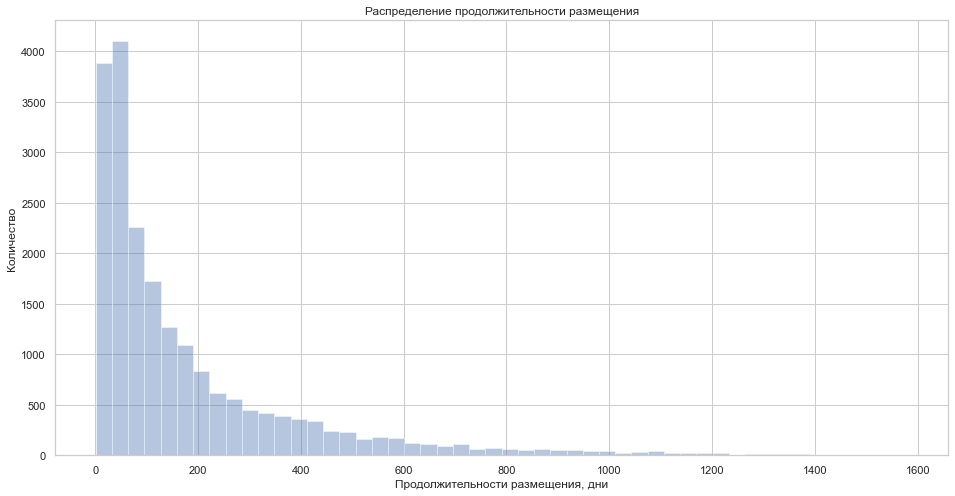

In [129]:
# Построит гистограмму
sns.distplot(df['days_exposition'], kde=False)
plt.xlabel("Продолжительности размещения, дни")
plt.ylabel('Количество')
plt.title('Распределение продолжительности размещения')
plt.show()

    На графике видно много значений с очень долгим периодом продажи квартиры. 
    Также видно что много значений скапливается в районе 0.

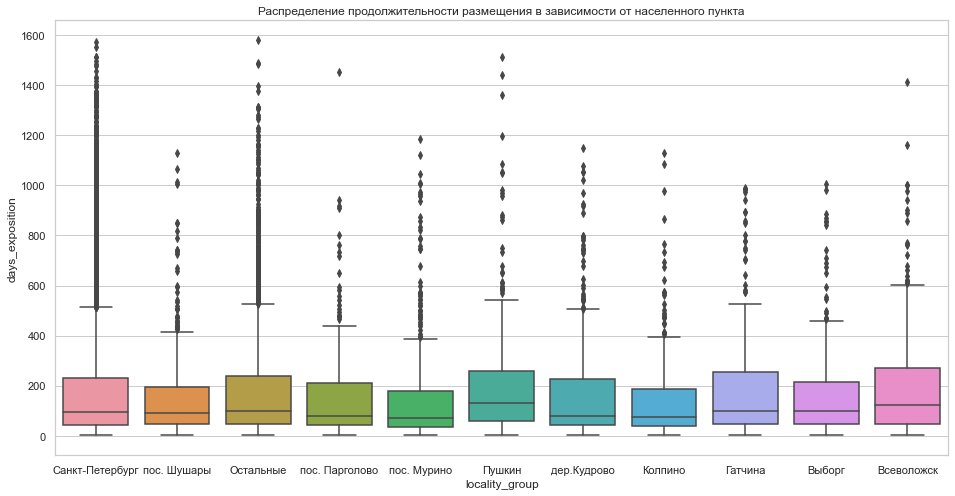

In [130]:
# Посмотрим на распределение в зависимости от населенного пункта
sns.boxplot(y = df['days_exposition'],
            x = df['locality_group'])

plt.title('Распределение продолжительности размещения в зависимости от населенного пункта')
plt.show()

    Видно, что имеется значительное количество выбросов. Причем сильной зависимости от населенного пункта не прослеживается.
    Примем продолжительность 600 дней, как аномально долгое.

In [131]:
# Посмотрим на долю квартир со сроком продажи более 730 дней
df.query('days_exposition > 600').days_exposition.count() / df.days_exposition.count()

0.05847581827063996

      6% объявлений со сроком продажи более 600 дней звучит очень неправдоподобно.
      Какие могут быть причины такого маленького срока:
      - после продажи квартиры клиенты не снимают квартиру с продажи
      - слишком завышенная стоимость квартиры
      - ошибки в записи данных

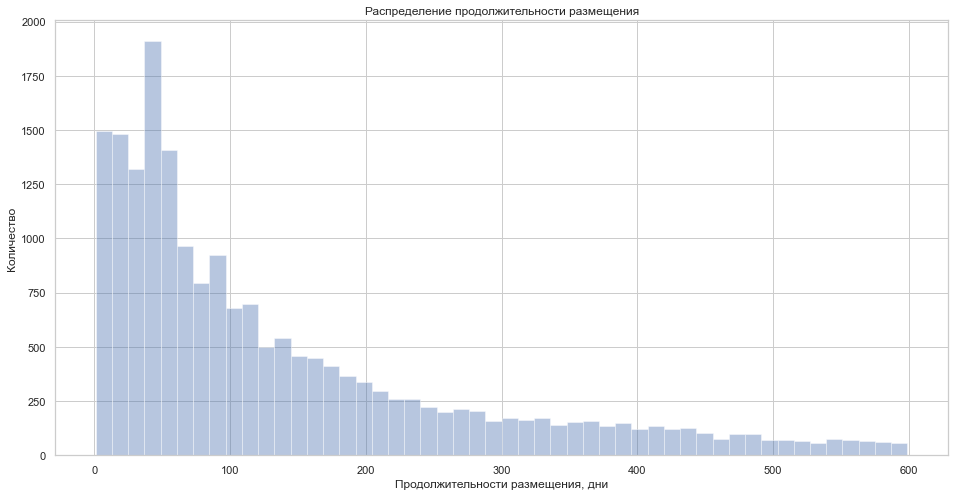

In [132]:
sns.distplot(df.query("days_exposition < 600")['days_exposition'], kde=False)

plt.xlabel("Продолжительности размещения, дни")
plt.ylabel('Количество')
plt.title('Распределение продолжительности размещения')
plt.show()

In [133]:
# Посмотрим на долю квартир со сроком продажи менее 7 дней
df.query('days_exposition < 7').days_exposition.count() / df.days_exposition.count()

0.02989741084513923

      3% объявлений со сроком продажи менее 7 дней тоже звучит очень неправдоподобно.
      Какие могут быть причины такого маленького срока:
      - возможно, это ошибка в записи данных. Например, когда клиент вносит изменения в обЪявление, срок обнуляется.
      - слишком заниженная стоимость квартиры, сразу находятся клиенты для покупки

    Для того, чтобы мы могли объективно оценить влияние срока продажи на формирование стоимости квартиры, необходимо очистить данные от аномальных значений.

In [134]:
# создадим столбец с очищенными данными
index_to_drop = df.query('days_exposition < 7 or days_exposition > 600').index
df['days_exposition_clear'] = df['days_exposition'].drop(index = index_to_drop)

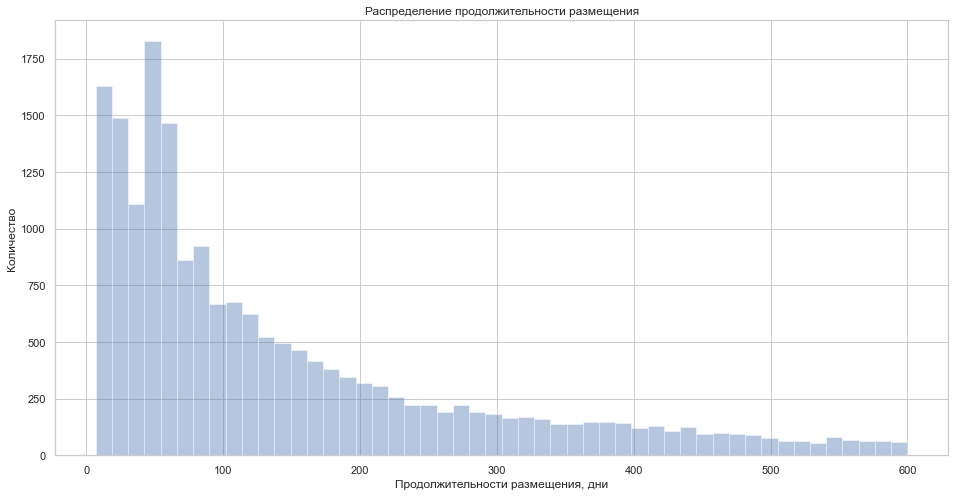

In [135]:
sns.distplot(df['days_exposition_clear'], kde=False)
plt.xlabel("Продолжительности размещения, дни")
plt.ylabel('Количество')
plt.title('Распределение продолжительности размещения')
plt.show()

In [136]:
# посмотрим на описательную статистику сырых и очищенных данных
df[['days_exposition_clear', 'days_exposition']].describe()

,days_exposition_clear,days_exposition
count,18661.000000,20470.000000
mean,143.379240,180.753200
std,136.865105,219.777916
min,7.000000,1.000000
25%,45.000000,45.000000
50%,91.000000,95.000000
75%,200.000000,231.000000
max,600.000000,1580.000000


    Медианное значение не очень изменилось и составляет 91 день
    Среднее значение изменилось сильнее, приблизилось к медиане и составляет 143 дня.

## Изучим площадь продаваемых квартир

In [137]:
# Посмотрим на описательную статистику
df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

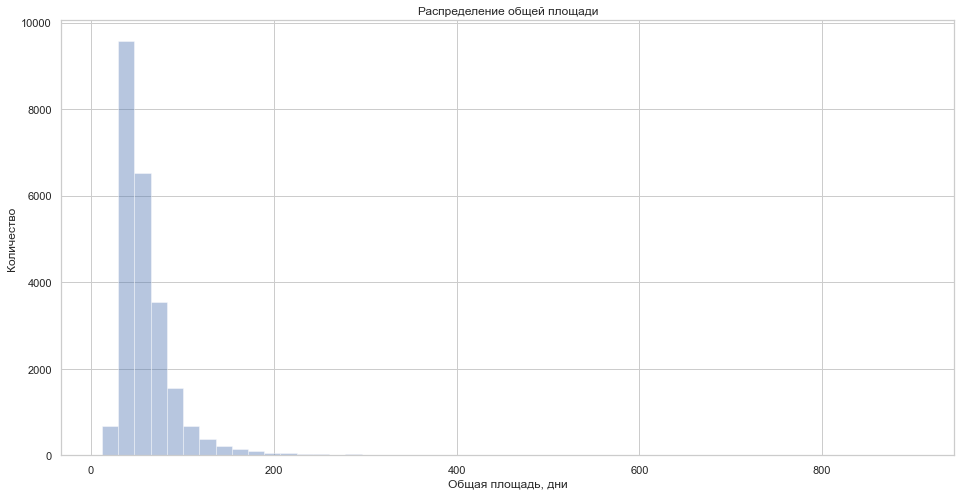

In [138]:
sns.distplot(df.total_area, kde=False)
plt.xlabel("Общая площадь, дни")
plt.ylabel('Количество')
plt.title('Распределение общей площади')
plt.show()

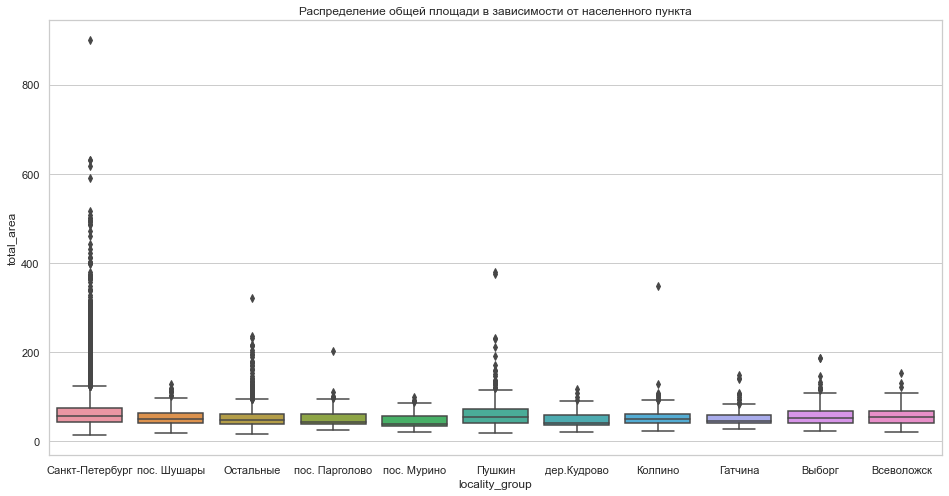

In [139]:
# Посмотрим на распределение в зависимости от населенного пункта
sns.boxplot(y = df['total_area'],
            x = df['locality_group'])

plt.title('Распределение общей площади в зависимости от населенного пункта')
plt.show()

    Видим, что больше всего выбросов в г. СПб.

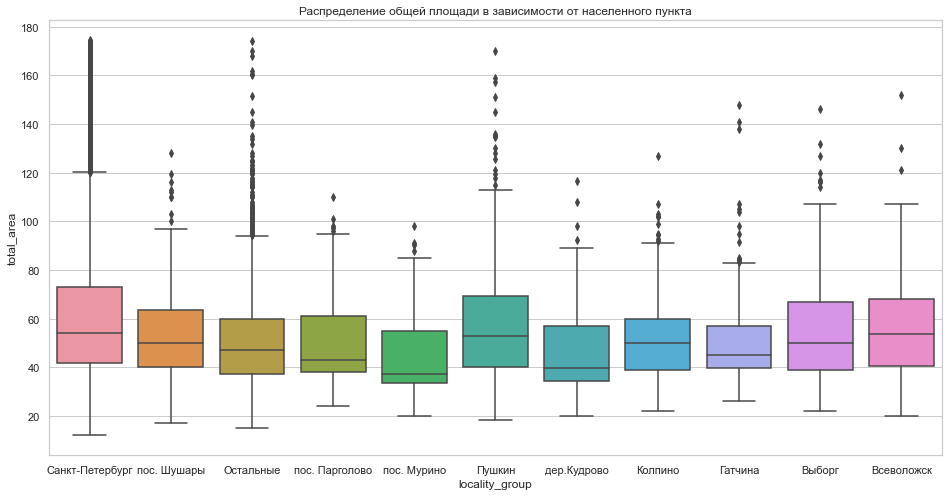

In [140]:
# Посмотрим на распределение с площадью менее 175м2
sns.boxplot(y = df.query('total_area < 175')['total_area'],
            x = df['locality_group'])

plt.title('Распределение общей площади в зависимости от населенного пункта')
plt.show()

In [141]:
# Посмотрим на долю квартир с площадью более 175м2
df.query('total_area > 175').total_area.count() / df.total_area.count()

0.014334038054968287

    Для того, чтобы мы могли объективно оценить влияние площади на формирование стоимости квартиры, необходимо очистить данные от аномальных значений.

In [142]:
# создадим столбец с очищенными данными
index_to_drop = df.query('total_area > 175').index
df['total_area_clear'] = df['total_area'].drop(index = index_to_drop)

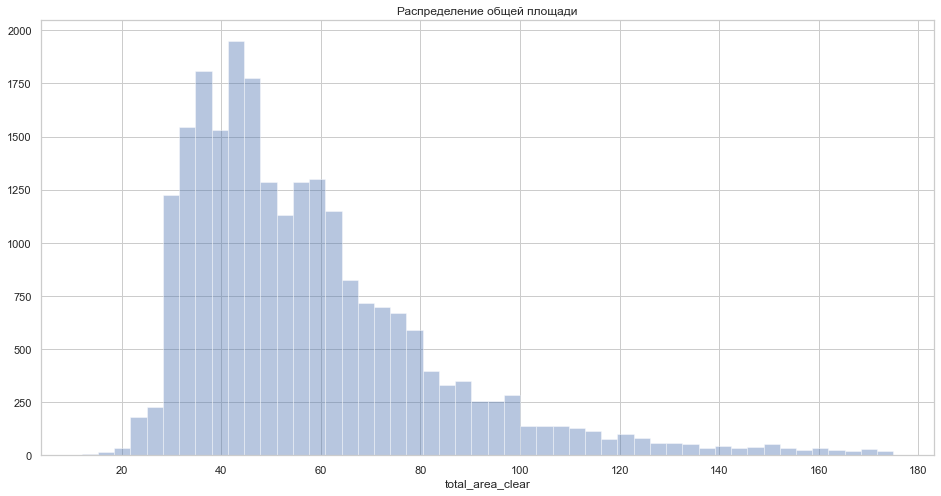

In [143]:
sns.distplot(df['total_area_clear'], kde=False)
plt.title('Распределение общей площади')
plt.show()

In [144]:
# посмотрим на описательную статистику сырых и очищенных данных
df[['total_area', 'total_area_clear']].describe()

,total_area,total_area_clear
count,23650.000000,23311.000000
mean,60.329069,57.538637
std,35.661808,25.035642
min,12.000000,12.000000
25%,40.000000,40.000000
50%,52.000000,51.400000
75%,69.700000,68.155000
max,900.000000,175.000000


In [145]:
# создадим столбец с очищенными данными для жилой площади
max_living_area = df[df.total_area_clear.notna()].living_area.max()

index_to_drop = df.query('living_area > @max_living_area').index
df['living_area_clear'] = df['living_area_clear'].drop(index = index_to_drop)

## Изучим число комнат продаваемых квартир

In [146]:
# Посмотрим на описательную статистику
df['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

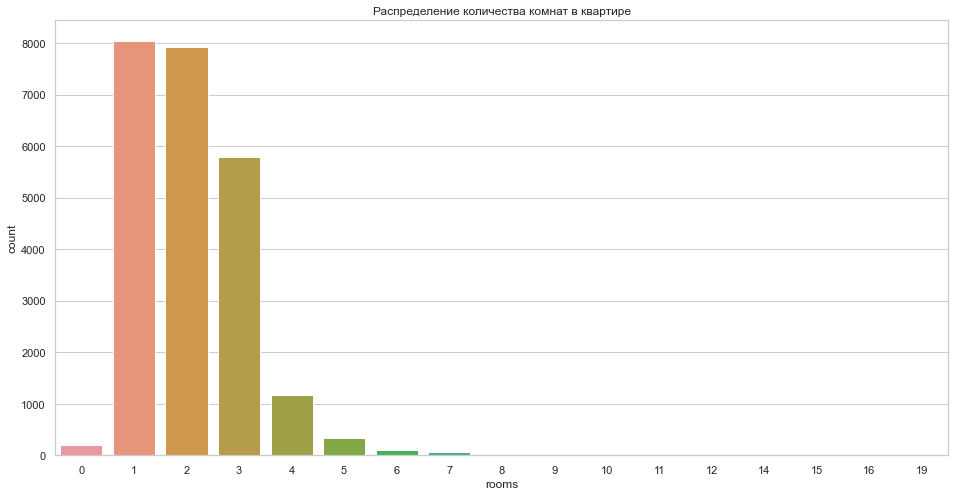

In [147]:
sns.countplot(df.rooms)
plt.title('Распределение количества комнат в квартире')
plt.show()

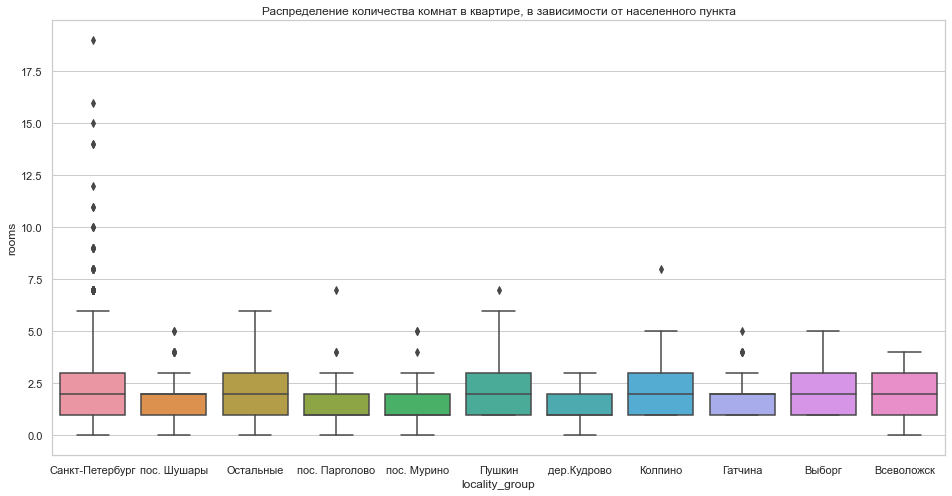

In [148]:
# Посмотрим на распределение в зависимости от населенного пункта
sns.boxplot(y = df['rooms'],
            x = df['locality_group'])

plt.title('Распределение количества комнат в квартире, в зависимости от населенного пункта')
plt.show()

    Видим, что больше всего выбросов в г. СПб. Скорее всего объявления с большим количеством комнат это продажа коммунальных квартир.

    Для того, чтобы мы могли объективно оценить влияние количества комнат на формирование стоимости квартиры, необходимо очистить данные от аномальных значений.

In [149]:
# создадим столбец с очищенными данными
index_to_drop = df.query('rooms > 6').index
df['rooms_clear'] = df['rooms'].drop(index = index_to_drop)

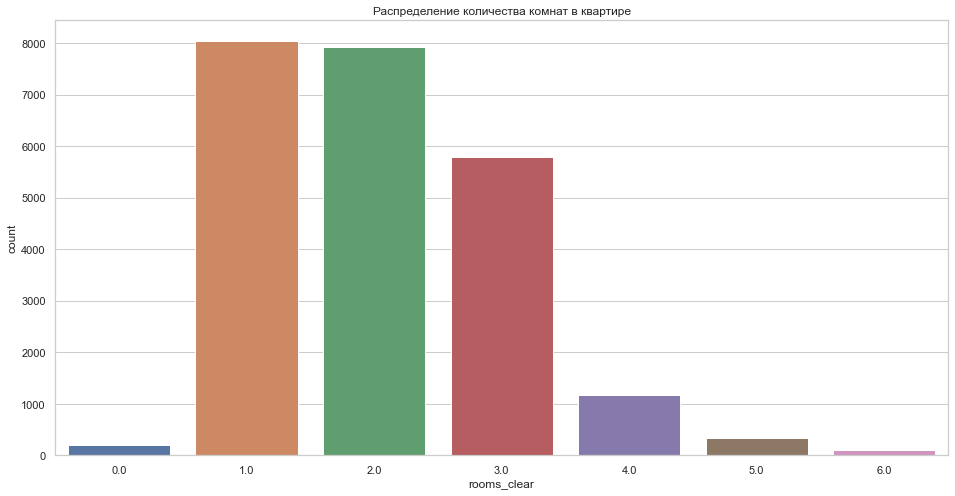

In [150]:
sns.countplot(df['rooms_clear'])
plt.title('Распределение количества комнат в квартире')
plt.show()

In [151]:
# посмотрим на описательную статистику сырых и очищенных данных
df[['rooms', 'rooms_clear']].describe()

,rooms,rooms_clear
count,23650.000000,23560.000000
mean,2.070106,2.047326
std,1.078620,1.006837
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,19.000000,6.000000


### Изучим высоту потолков продаваемых квартир

    На этапе предобработки данных, мы уже очищали данные от ошибок в заполнении. Посмотрим более подробно на получившиеся значения.

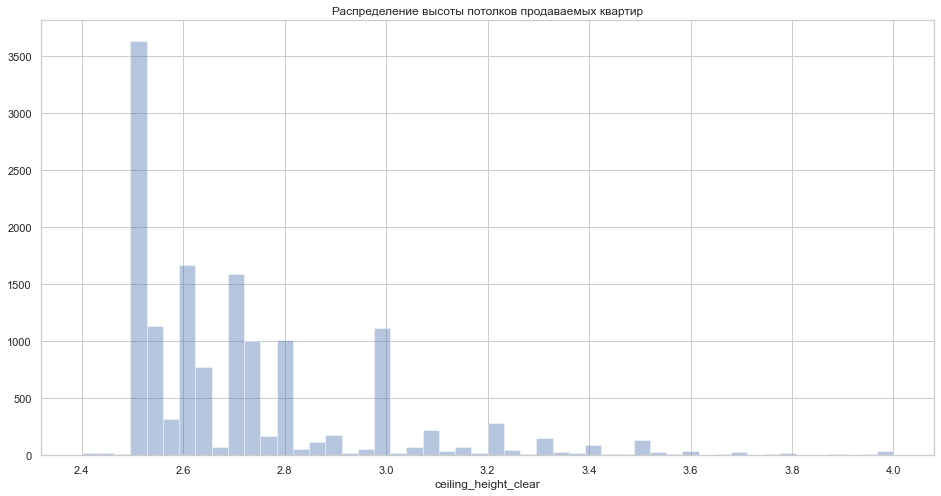

In [152]:
sns.distplot(df['ceiling_height_clear'], kde=False)
plt.title('Распределение высоты потолков продаваемых квартир')
plt.show()

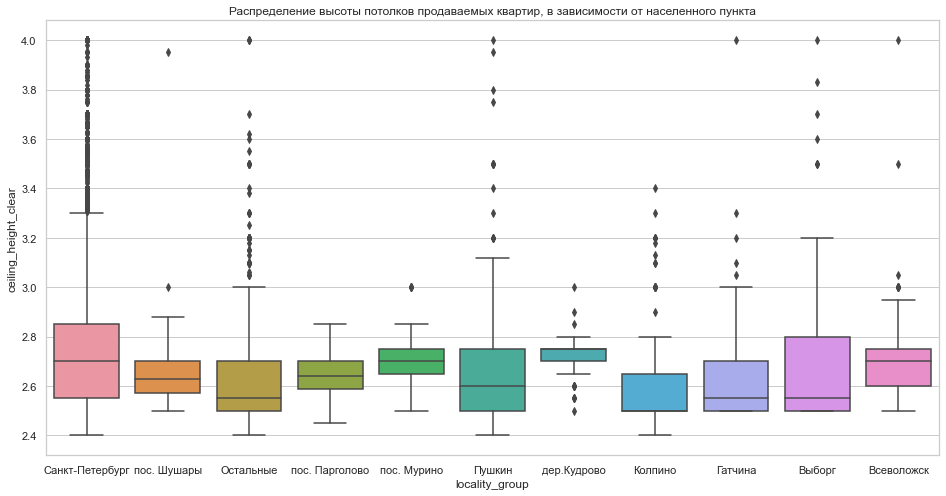

In [153]:
# Посмотрим на распределение в зависимости от населенного пункта
sns.boxplot(y = df['ceiling_height_clear'],
            x = df['locality_group'])
plt.title('Распределение высоты потолков продаваемых квартир, в зависимости от населенного пункта')
plt.show()

    Видим, что варьиативность параметра сильно зависит от населенного пункта. Традиционно в г.СПб больше всего выбросов. В целом очищенные данные выглядят объективно.

### Изучим стоимость продаваемых квартир

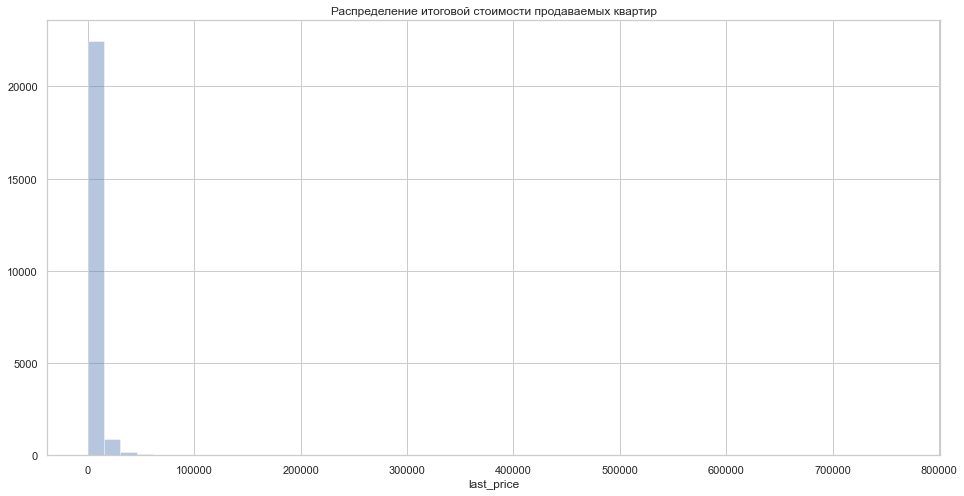

In [154]:
sns.distplot(df['last_price'], kde=False)
plt.title('Распределение итоговой стоимости продаваемых квартир')
plt.show()

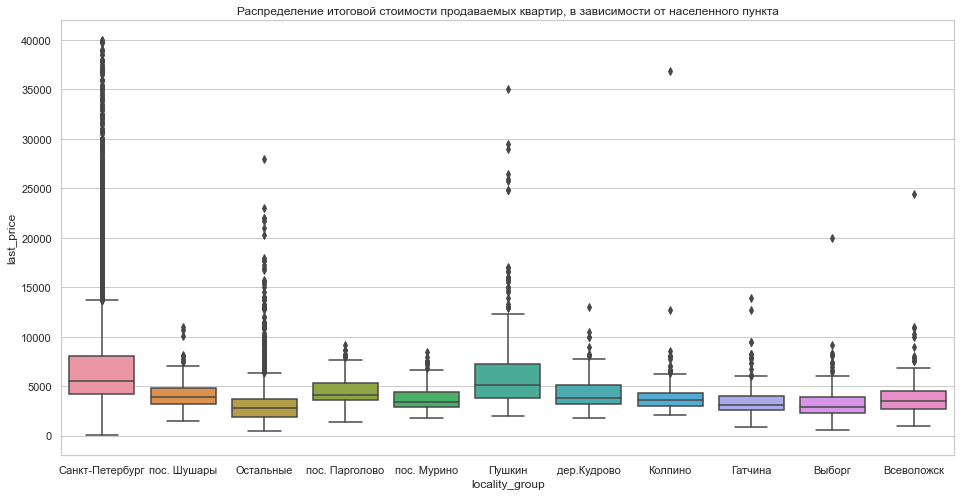

In [155]:
# Посмотрим на распределение в зависимости от населенного пункта и стоимости менее 40млн. руб
sns.boxplot(y = df.query("last_price < 40000")['last_price'],
            x = df['locality_group'])
plt.title('Распределение итоговой стоимости продаваемых квартир, в зависимости от населенного пункта')
plt.show()

    Для того, чтобы мы могли объективно оценить влияние характеристик на формирование стоимости квартиры,
    необходимо очистить данные от аномальных значений.

In [156]:
# создадим столбец с очищенными данными
index_to_drop = df.query('last_price > 40000').index
df['last_price_clear'] = df['last_price'].drop(index = index_to_drop)

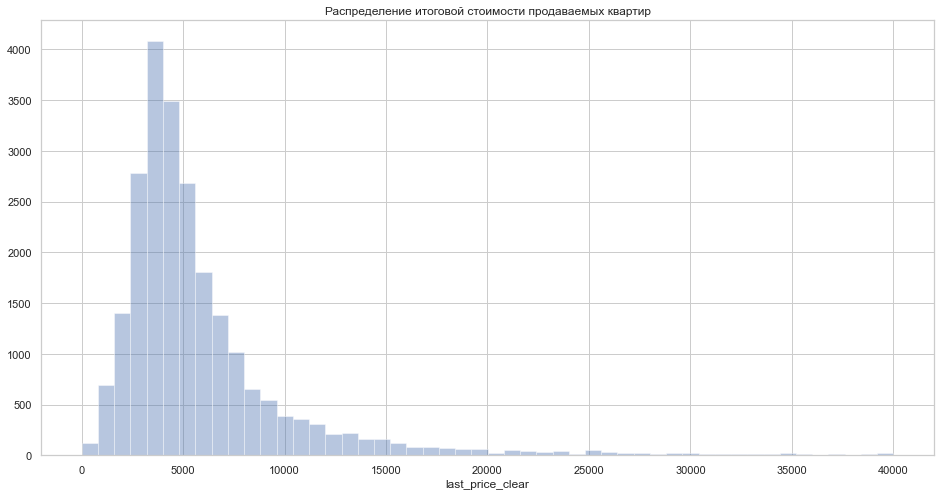

In [157]:
sns.distplot(df['last_price_clear'], kde=False)
plt.title('Распределение итоговой стоимости продаваемых квартир')
plt.show()

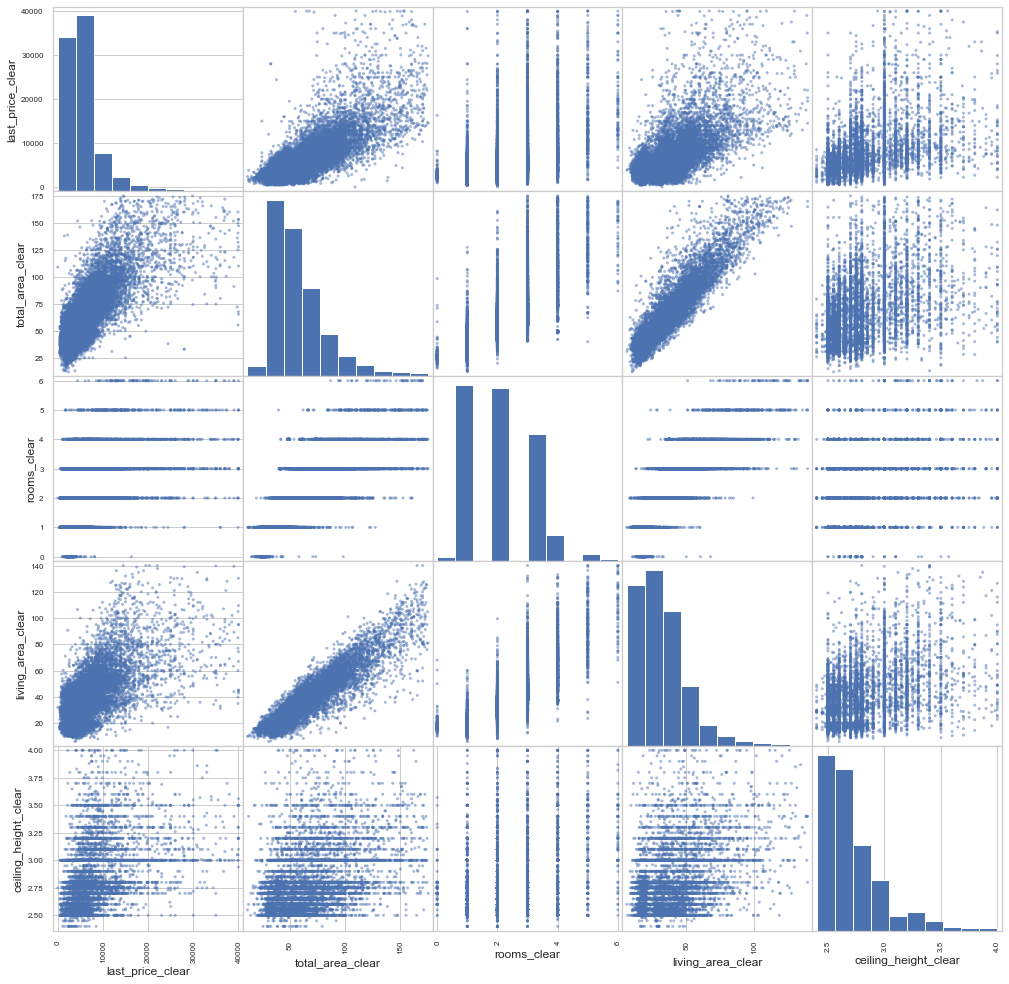

In [158]:
# Посмотрим на зависимость стоимости квартиры от основных показателей для очищенных данных
columns_clear = ['last_price_clear', 'total_area_clear', 'rooms_clear', 'living_area_clear', 'ceiling_height_clear']
pd.plotting.scatter_matrix(df[columns_clear], figsize=(17, 17))
plt.show()

In [159]:
# отчистим наши данные от данных с ошибками
columns = ['last_price', 'total_area', 'rooms', 'living_area', 'ceiling_height',
          'kitchen_area', 'airports_nearest', 'days_exposition']

df_clear = df.drop(columns = columns)

<a name="stage_cor"></a>

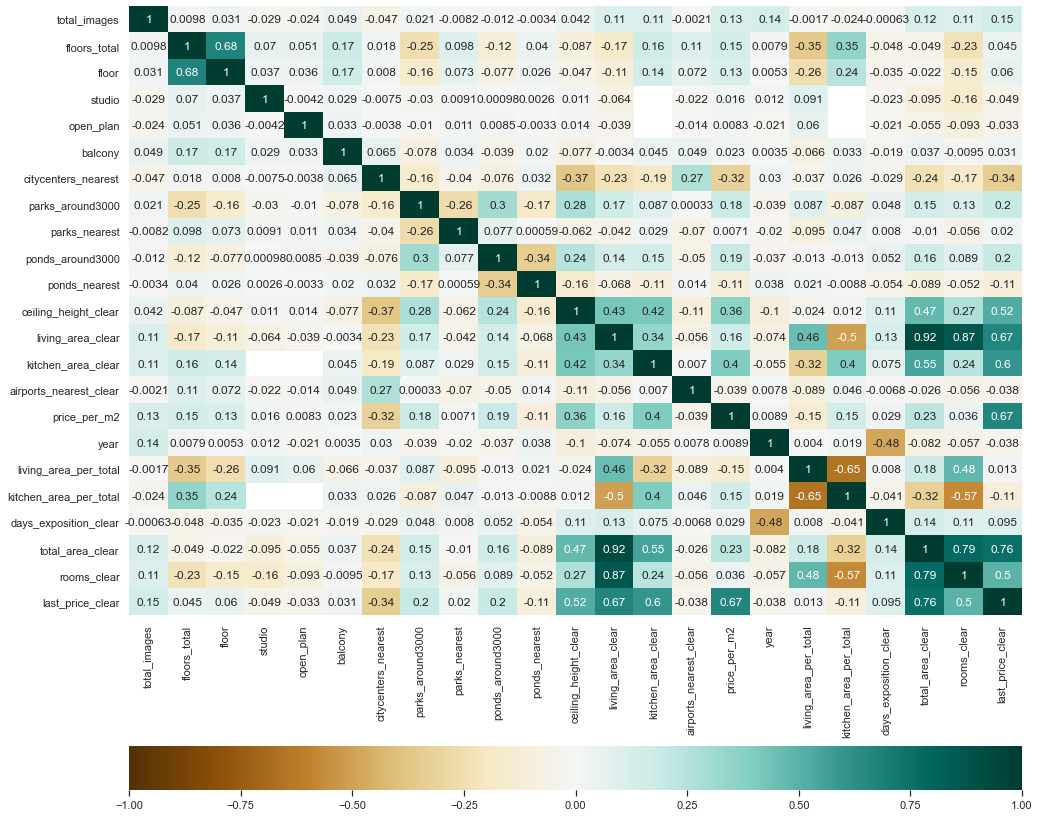

In [160]:
# посмотрим на корреляционную матрицу
plt.figure(figsize=(16, 16))
sns.heatmap(df_clear.corr(),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='BrBG',
            cbar_kws={"orientation": "horizontal"})

In [161]:
# Посмотрим на числовые типы данных от которых больше всего зависит стоимость квартиры
df_clear.corr()[(df_clear.corr()['last_price_clear'] < -0.4) | (df_clear.corr()['last_price_clear'] > 0.4)]['last_price_clear']

ceiling_height_clear    0.521730
living_area_clear       0.669751
kitchen_area_clear      0.604068
price_per_m2            0.671743
total_area_clear        0.764464
rooms_clear             0.495357
last_price_clear        1.000000
Name: last_price_clear, dtype: float64

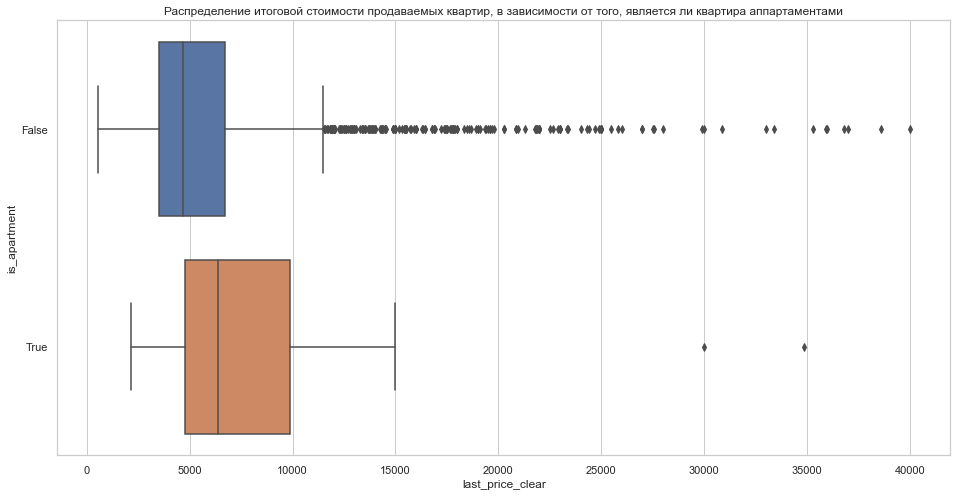

In [162]:
# посмотрим на распределение стоимости в зависимости от того, является ли квартира аппартаментами
sns.boxplot(data = df_clear,
           y = 'is_apartment',
           x = 'last_price_clear',
           orient="h")

plt.title('Распределение итоговой стоимости продаваемых квартир, в зависимости от того, является ли квартира аппартаментами')
plt.show()

In [163]:
df_clear['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

    Судя по графику, аппартаменты дороже обычных квартир. Но мы не можем считать этот график репрезентативным, т.к. квартир аппартаментов очень мало для объективного анализа.

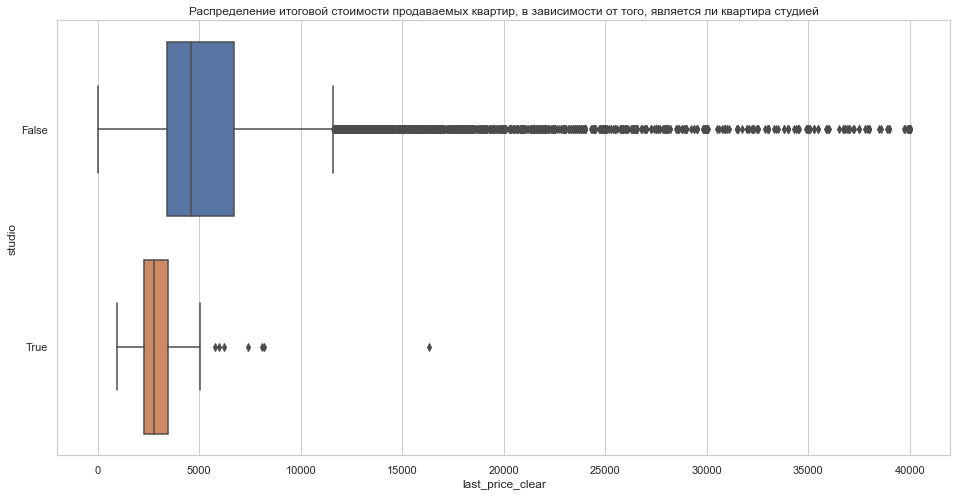

In [164]:
# посмотрим на распределение стоимости в зависимости от того, является ли квартира студией
sns.boxplot(data = df_clear,
           y = 'studio',
           x = 'last_price_clear',
           orient="h")

plt.title('Распределение итоговой стоимости продаваемых квартир, в зависимости от того, является ли квартира студией')
plt.show()

In [165]:
df_clear['studio'].value_counts()

False    23501
True       149
Name: studio, dtype: int64

    На этом графике мы видим вполне логичную закономерность. Студии дешевле остальных квартир, т.к. они имеют минимальную площадь.

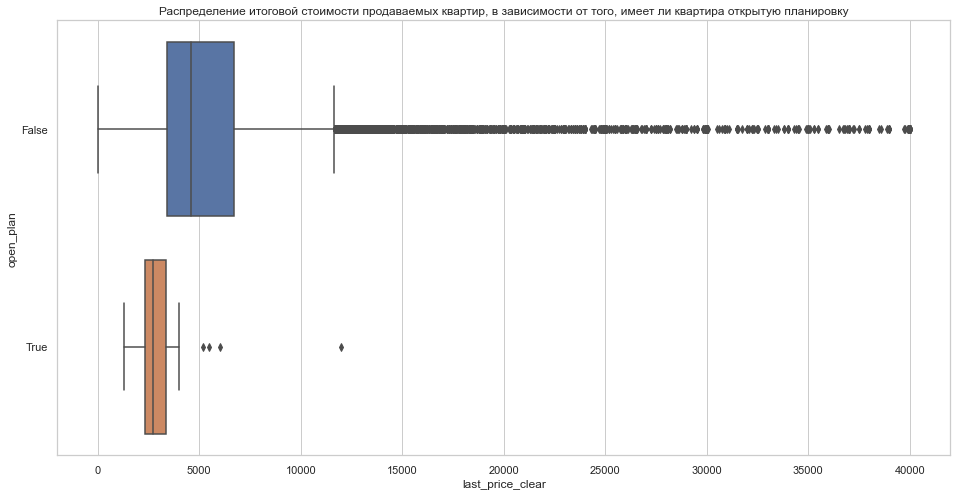

In [166]:
# посмотрим на распределение стоимости в зависимости от того, имеет ли квартира открытую планировку
sns.boxplot(data = df_clear,
           y = 'open_plan',
           x = 'last_price_clear',
           orient="h")

plt.title('Распределение итоговой стоимости продаваемых квартир, в зависимости от того, имеет ли квартира открытую планировку')
plt.show()

In [167]:
df_clear['open_plan'].value_counts()

False    23583
True        67
Name: open_plan, dtype: int64

    На этом графике мы видим вполне логичную закономерность. Квартиры с открытой планировкой дешевле остальных квартир, т.к. они имеют минимальную площадь.

In [168]:
df_clear.columns

Index(['total_images', 'first_day_exposition', 'floors_total', 'floor',
       'is_apartment', 'studio', 'open_plan', 'balcony', 'locality_name',
       'citycenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'ceiling_height_clear',
       'living_area_clear', 'kitchen_area_clear', 'airports_nearest_clear',
       'price_per_m2', 'day_name', 'month_name', 'year', 'name_floor',
       'living_area_per_total', 'kitchen_area_per_total', 'locality_group',
       'days_exposition_clear', 'total_area_clear', 'rooms_clear',
       'last_price_clear'],
      dtype='object')

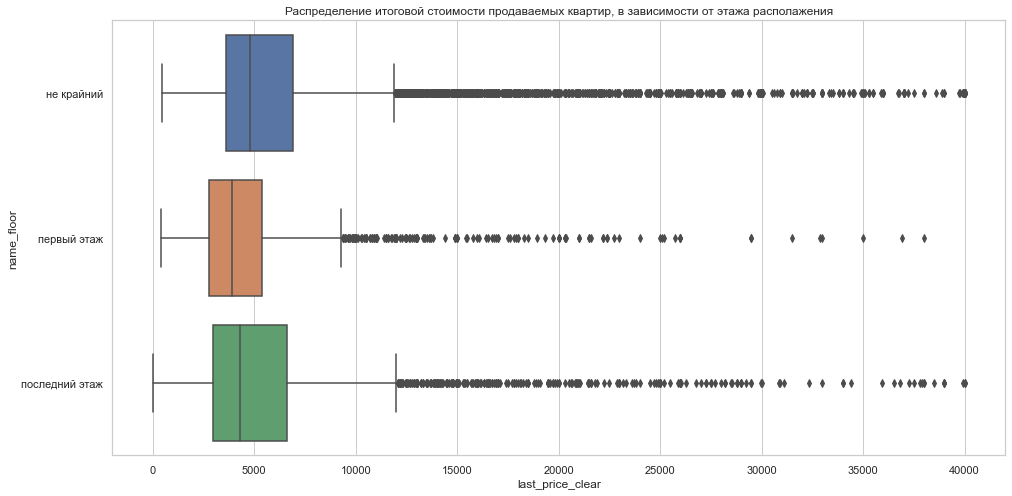

In [169]:
# посмотрим на распределение стоимости в зависимости от того, на каком этаже находится квартира
sns.boxplot(data = df_clear,
           y = 'name_floor',
           x = 'last_price_clear',
           orient="h")

plt.title('Распределение итоговой стоимости продаваемых квартир, в зависимости от этажа располажения')
plt.show()

    На этом графике мы также видим логичную закономерность. Квартиры на первом и последнем этаже стоят немного дешевле, чем квартиры находящиеся по середине здания. Но тем не менее, эта зависимость не очень сильная.

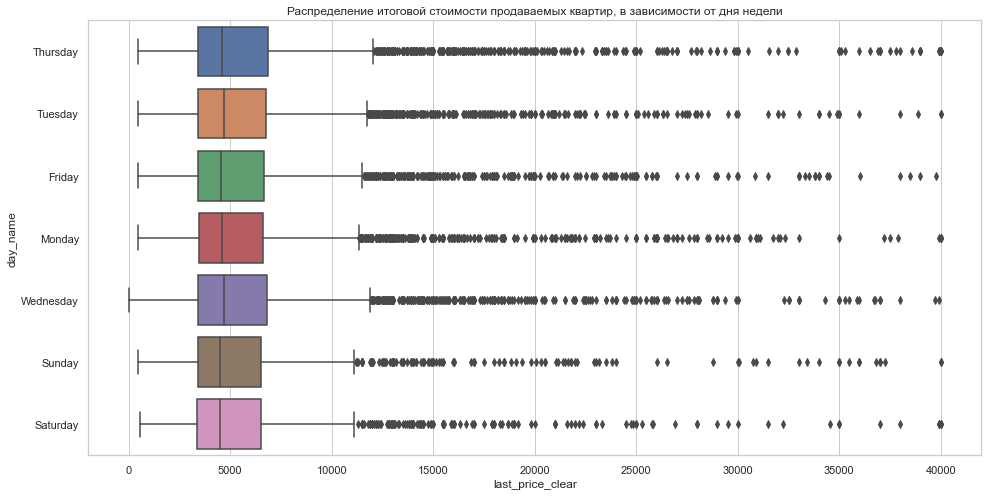

In [170]:
# посмотрим на распределение стоимости в зависимости от того, в какой день недели была выложена квартира
sns.boxplot(data = df_clear,
           y = 'day_name',
           x = 'last_price_clear',
           orient="h")

plt.title('Распределение итоговой стоимости продаваемых квартир, в зависимости от дня недели')
plt.show()

     Никакой зависимости от дня недели не наблюдается, что вполне логично.

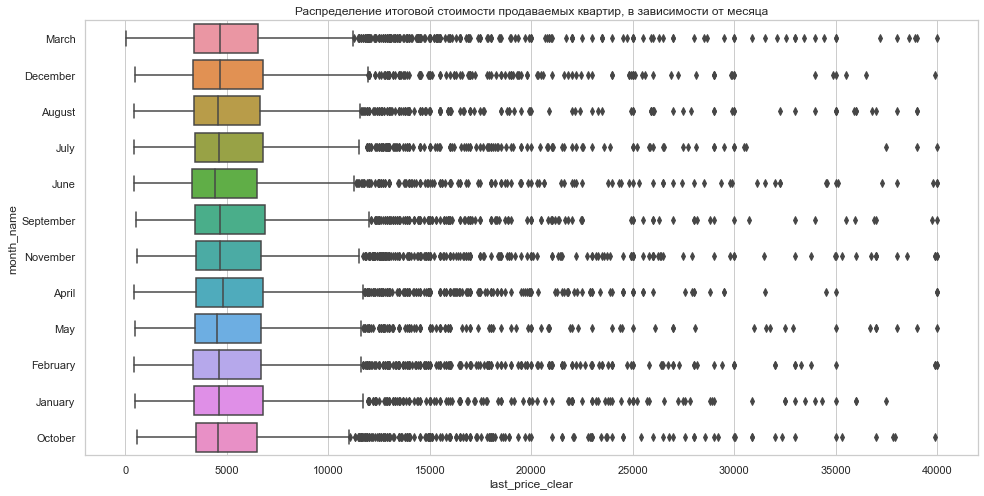

In [171]:
# посмотрим на распределение стоимости в зависимости от того, в какой месяц была выложена квартира
sns.boxplot(data = df_clear,
           y = 'month_name',
           x = 'last_price_clear',
           orient="h")

plt.title('Распределение итоговой стоимости продаваемых квартир, в зависимости от месяца')
plt.show()

    Никакой зависимости от дня недели не наблюдается, что вполне логично.

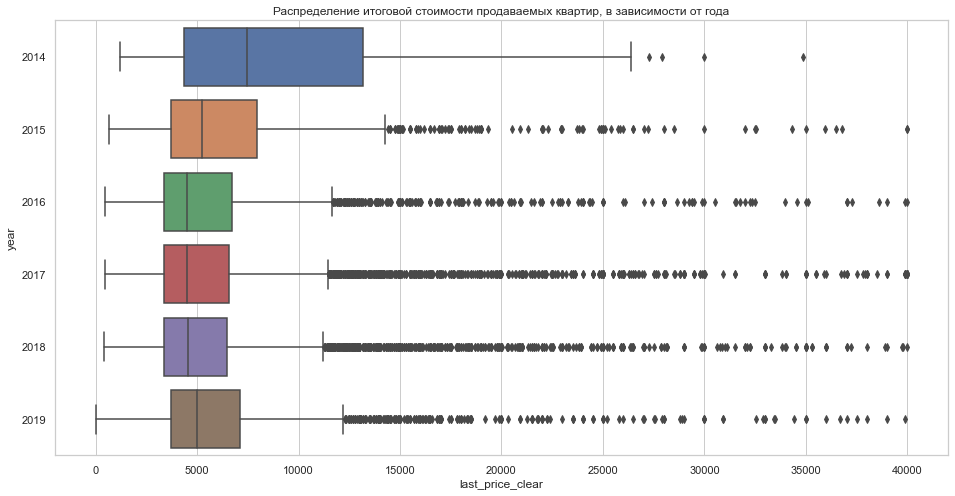

In [172]:
# посмотрим на распределение стоимости в зависимости от того, в какой год была выложена квартира
sns.boxplot(data = df_clear,
           y = 'year',
           x = 'last_price_clear',
           orient="h")

plt.title('Распределение итоговой стоимости продаваемых квартир, в зависимости от года')
plt.show()

    В 2014 году валатильность цен на недвижимость значительно больше, чем в последующих годах.
    Причин для этого может быть много, так что не будем на этом подробно останавливаться.

<a name="stage_3"></a>
# 3. Исследовательский анализ данных г. Санкт - Петербург. Построение модели линейной регрессии.


[Наверх к оглавлению](#contents)

    Для начала нужно подготовить данные для анализа. Также посмотрим на возможность заполнения пропущенных значений.

In [173]:
# Отберем объявления из г. СПб и оставим только очищенные данные
spb = df_clear.query('locality_name == "Санкт-Петербург"')

In [174]:
# посмотрим на количество пропущенных значений
spb.isna().sum()[spb.isna().sum() > 0]

floors_total                 70
is_apartment              13888
citycenters_nearest          61
parks_around3000             61
parks_nearest              8437
ponds_around3000             61
ponds_nearest              7738
ceiling_height_clear       5680
living_area_clear          1286
kitchen_area_clear         1429
airports_nearest_clear       85
living_area_per_total      1145
kitchen_area_per_total     1429
days_exposition_clear      3356
total_area_clear            316
rooms_clear                  87
last_price_clear            181
dtype: int64

`total_area_clear`, `kitchen_area_clear`, `living_area_clear`  - проверим, есть ли сильная корреляция с какими либо параметрами, на основе которых можно заполнить пропуски. 

`living_area_per_total`, `kitchen_area_per_total` - можно заполнить пропуски, если удастся восстановить `total_area_clear`

В остальных столбцах не сможем заполнить пропуски, т.к. нет корреляции с каким либо из параметров.

[Смотри корреляционную матрицу](#stage_cor)

In [175]:
# посмотрим с какими параметрами коллерирует жилая площадь
spb.corr()[(spb.corr()['living_area_clear'] < -0.4) | (spb.corr()['living_area_clear'] > 0.4)]['living_area_clear']

ceiling_height_clear      0.451813
living_area_clear         1.000000
living_area_per_total     0.447691
kitchen_area_per_total   -0.484706
total_area_clear          0.924290
rooms_clear               0.865320
last_price_clear          0.694959
Name: living_area_clear, dtype: float64

    Видим, что есть сильная корреляция с общей площадью и количеством комнат.

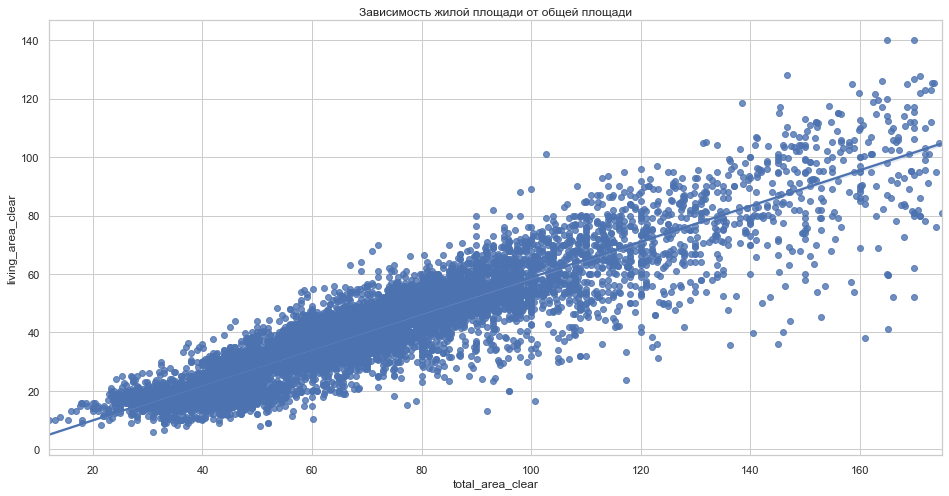

In [176]:
# посмотрим на регрессионную прямую
sns.regplot(data= spb, x = 'total_area_clear', y = 'living_area_clear')

plt.title('Зависимость жилой площади от общей площади')
plt.show()

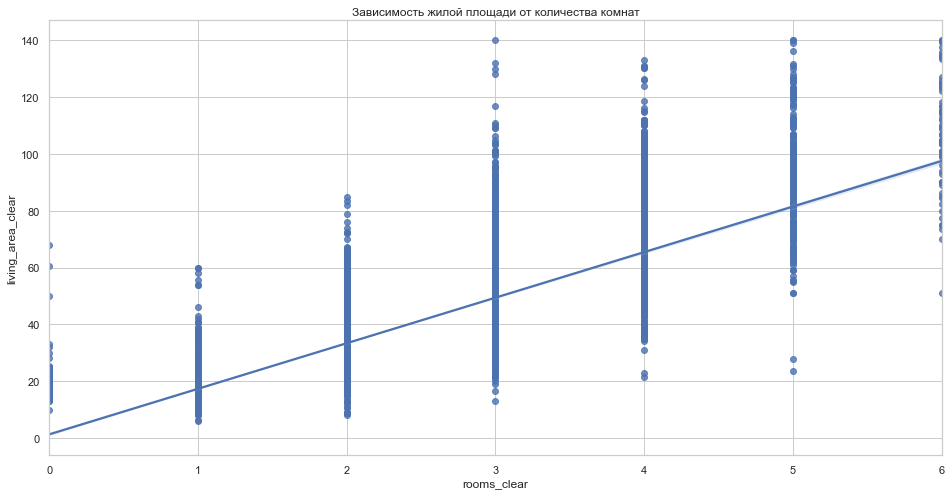

In [177]:
# посмотрим на регрессионную прямую
sns.regplot(data= spb, x = 'rooms_clear', y = 'living_area_clear')

plt.title('Зависимость жилой площади от количества комнат')
plt.show()

    На графиках видно, что зависимость прямая, следовательно можно найти уравнение линейной регрессии
    и заполнить пропуска на основе имеющейся модели.

In [178]:
spb_living_area_model = (spb[spb['total_area_clear'].notna() &
                       spb['living_area_clear'].notna() &
                       spb['rooms_clear'].notna()])

In [179]:
# Найдем коэффициенты уравнения линейной регрессии
Y = spb_living_area_model['living_area_clear']
X = spb_living_area_model[['total_area_clear', 'rooms_clear']]
X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
model = sm.OLS(Y, X)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:      living_area_clear   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 6.839e+04
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:56:31   Log-Likelihood:                -44497.
No. Observations:               14283   AIC:                         8.900e+04
Df Residuals:                   14280   BIC:                         8.902e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.3708      0.115  

     Получившаяся модель, описывает 91% изменчивости жилой площади.

In [180]:
# посмотрим на количество пропущенных значений
spb.living_area_clear.isna().sum()

1286

In [181]:
# заполним пропущенные значения
total_area = spb.loc[(spb['living_area_clear'].isna() &
                            spb['rooms_clear'].notna() &
                            spb['total_area_clear'].notna(),
                            'total_area_clear')]

rooms = spb.loc[(spb['living_area_clear'].isna() &
                            spb['rooms_clear'].notna() &
                            spb['total_area_clear'].notna(),
                            'rooms_clear')]

spb.loc[(spb['living_area_clear'].isna() &
         spb['rooms_clear'].notna() &
         spb['total_area_clear'].notna(),
         'living_area_clear')] = -4.3708 + 0.4186 * total_area + 6.5327 * rooms

In [182]:
# посмотрим на количество оставшихся пропущенных значений
spb.living_area_clear.isna().sum()

179

In [183]:
# посмотрим с какими параметрами коллерирует общая площадь
spb.corr()[(spb.corr()['total_area_clear'] < -0.4) | (spb.corr()['total_area_clear'] > 0.4)]['total_area_clear']

ceiling_height_clear    0.483706
living_area_clear       0.927687
kitchen_area_clear      0.569805
total_area_clear        1.000000
rooms_clear             0.782422
last_price_clear        0.792639
Name: total_area_clear, dtype: float64

    Видим, что есть сильная корреляция с жилой площадью, количеством комнат и стоимостью.

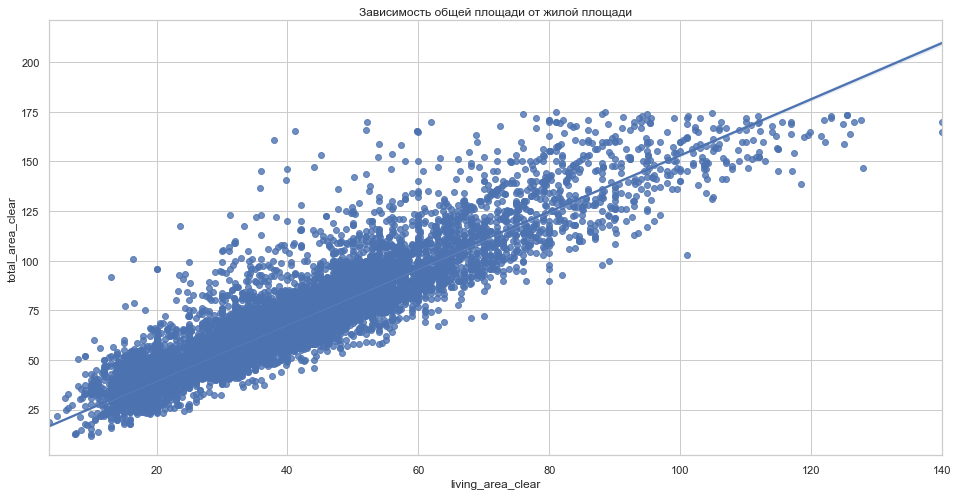

In [184]:
# посмотрим на регрессионную прямую
sns.regplot(data= spb, x = 'living_area_clear', y = 'total_area_clear')

plt.title('Зависимость общей площади от жилой площади')
plt.show()

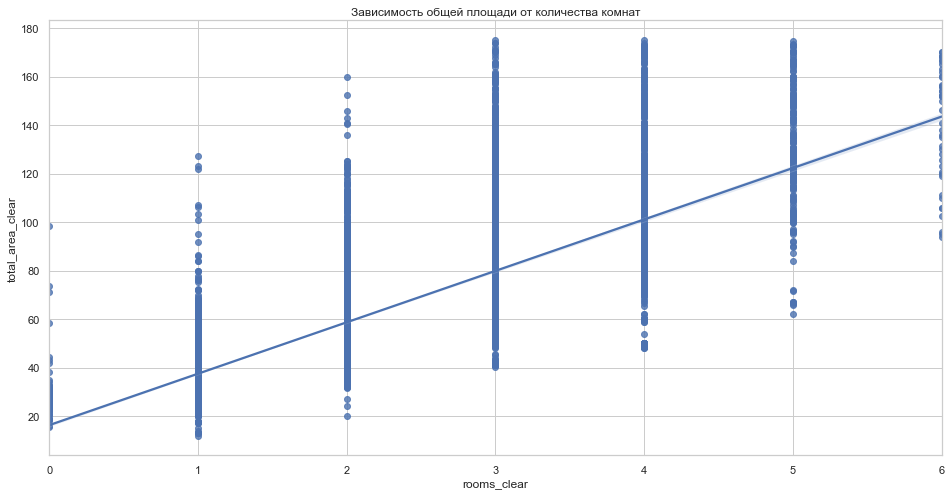

In [185]:
# посмотрим на регрессионную прямую
sns.regplot(data= spb, x = 'rooms_clear', y = 'total_area_clear')

plt.title('Зависимость общей площади от количества комнат')
plt.show()

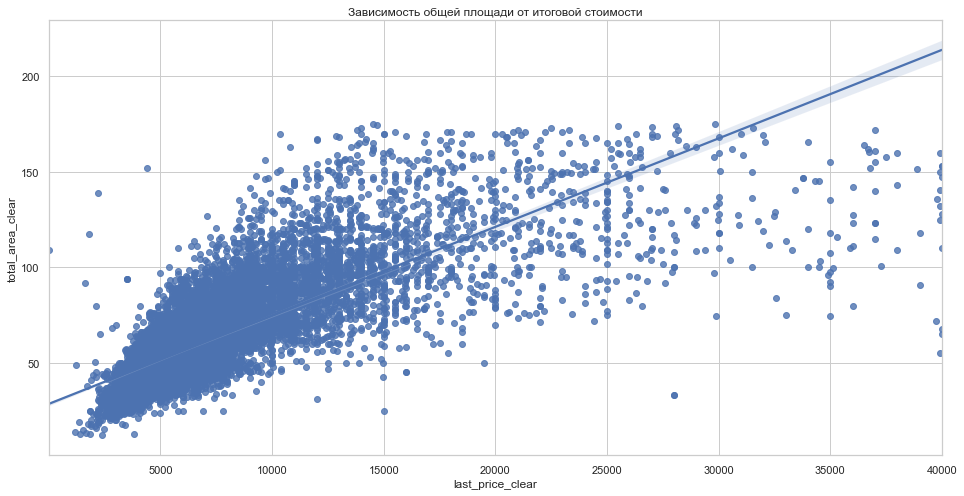

In [186]:
# посмотрим на регрессионную прямую
sns.regplot(data= spb, x = 'last_price_clear', y = 'total_area_clear')

plt.title('Зависимость общей площади от итоговой стоимости')
plt.show()

    На графиках видно, что зависимость со стоимостью квартиры не прямая, следовательно для построения модели 
    мы будем использовать только жилую площадь и количество комнат.

In [187]:
spb_total_area_model = (spb[spb['total_area_clear'].notna() &
                           spb['living_area_clear'].notna() &
                           spb['rooms_clear'].notna()])

In [188]:
# Найдем коэффициенты уравнения линейной регрессии
Y = spb_total_area_model['total_area_clear']
X = spb_total_area_model[['living_area_clear', 'rooms_clear']]
X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
model = sm.OLS(Y, X)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:       total_area_clear   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 4.811e+04
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:56:37   Log-Likelihood:                -57392.
No. Observations:               15390   AIC:                         1.148e+05
Df Residuals:                   15387   BIC:                         1.148e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.5126      0.19

     Получившаяся модель, описывает 86% изменчивости общей площади.

In [189]:
# посмотрим на количество пропущенных значений до заполнения пропусков
spb.total_area_clear.isna().sum()

316

In [190]:
# заполним пропущенные значения
living_area = spb.loc[(spb['total_area_clear'].isna() &
                            spb['rooms_clear'].notna() &
                            spb['living_area_clear'].notna(),
                            'living_area_clear')]

rooms = spb.loc[(spb['total_area_clear'].isna() &
                            spb['rooms_clear'].notna() &
                            spb['living_area_clear'].notna(),
                            'rooms_clear')]

spb.loc[(spb['total_area_clear'].isna() &
         spb['rooms_clear'].notna() &
         spb['living_area_clear'].notna(),
         'total_area_clear')] = 12.5126 + 1.5396 * living_area - 2.5184 * rooms

In [191]:
# посмотрим на количество оставшихся пропущенных значений
spb.total_area_clear.isna().sum()

191

In [192]:
# посмотрим с какими параметрами коллерирует площадь кухни
spb.corr()[(spb.corr()['kitchen_area_clear'] < -0.4) | (spb.corr()['kitchen_area_clear'] > 0.4)]['kitchen_area_clear']

ceiling_height_clear    0.410180
kitchen_area_clear      1.000000
total_area_clear        0.578838
last_price_clear        0.615227
Name: kitchen_area_clear, dtype: float64

    Видим, что сильной корреляции не наблюдается.

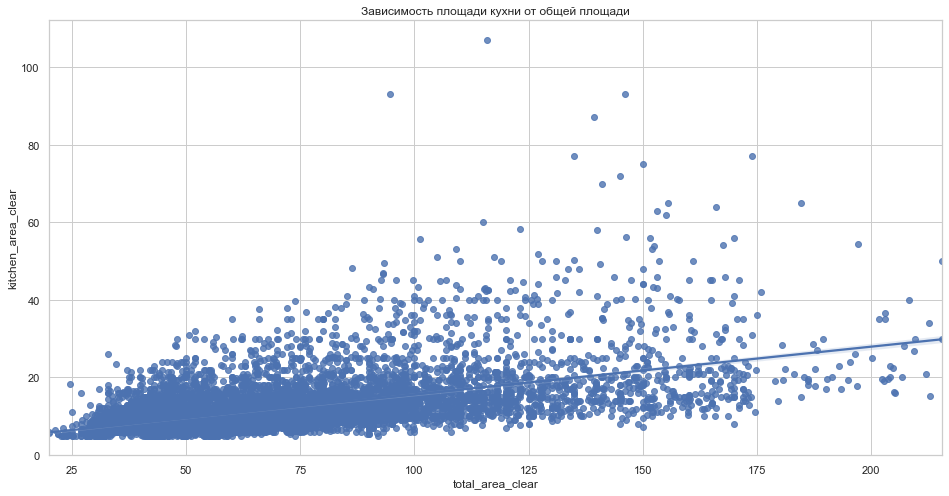

In [193]:
# посмотрим на регрессионную прямую
sns.regplot(data= spb, x = 'total_area_clear', y = 'kitchen_area_clear')

plt.title('Зависимость площади кухни от общей площади')
plt.show()

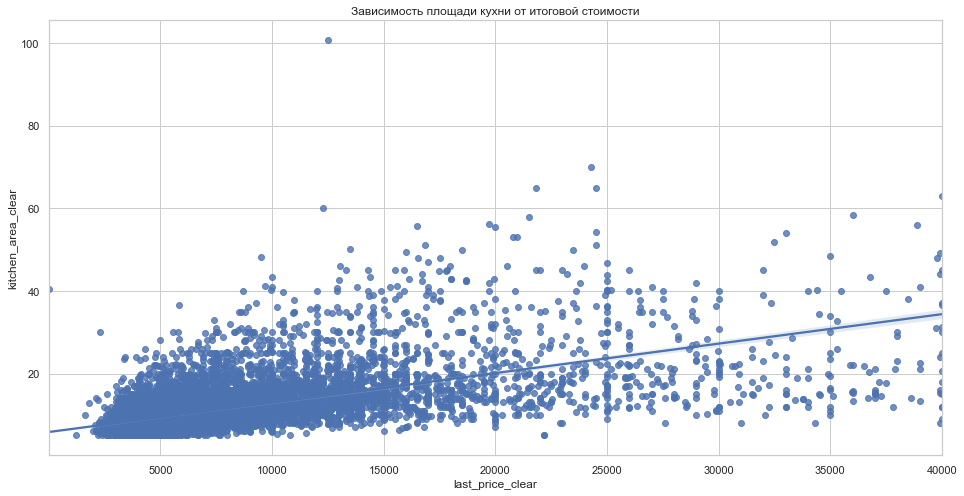

In [194]:
# посмотрим на регрессионную прямую
sns.regplot(data= spb, x = 'last_price_clear', y = 'kitchen_area_clear')

plt.title('Зависимость площади кухни от итоговой стоимости')
plt.show()

    На графиках видно, что зависимости прямые, попробуем построить регрессионную модель.

In [195]:
spb_kitchen_area_model = (spb[spb['kitchen_area_clear'].notna() &
                           spb['total_area_clear'].notna() &
                           spb['last_price_clear'].notna()])

In [196]:
# Найдем коэффициенты уравнения линейной регрессии
Y = spb_kitchen_area_model['kitchen_area_clear']
X = spb_kitchen_area_model[['total_area_clear', 'last_price_clear']]
X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
model = sm.OLS(Y, X)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:     kitchen_area_clear   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     4661.
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:56:41   Log-Likelihood:                -40672.
No. Observations:               14040   AIC:                         8.135e+04
Df Residuals:                   14037   BIC:                         8.137e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.3422      0.092  

     Получившаяся модель, описывает 40% изменчивости площади кухни. На основе такой модели мы не можем заполнять пропущенные значения, поэтому оставим пропуски как есть.

    Т.к. мы восстановили пропуска в колонках с площадями. Посчитаем значения в колонках:
    `living_area_per_total` и `kitchen_area_per_total`

In [197]:
spb['living_area_per_total'] = spb['living_area_clear'] / spb['total_area_clear']
spb['kitchen_area_per_total'] = spb['kitchen_area_clear'] / spb['total_area_clear']

In [198]:
# посмотрим на количество оставшихся пропусков
spb.isna().sum()[spb.isna().sum() > 0]

floors_total                 70
is_apartment              13888
citycenters_nearest          61
parks_around3000             61
parks_nearest              8437
ponds_around3000             61
ponds_nearest              7738
ceiling_height_clear       5680
living_area_clear           179
kitchen_area_clear         1429
airports_nearest_clear       85
living_area_per_total       192
kitchen_area_per_total     1584
days_exposition_clear      3356
total_area_clear            191
rooms_clear                  87
last_price_clear            181
dtype: int64

In [199]:
# посмотрим еще раз, на корреляцию стоимости недвижимости и остальных ее параметров
spb.corr()['last_price_clear']

total_images              0.133835
floors_total             -0.053471
floor                     0.005792
studio                   -0.051241
open_plan                -0.030569
balcony                   0.025417
citycenters_nearest      -0.409662
parks_around3000          0.201224
parks_nearest             0.010014
ponds_around3000          0.215773
ponds_nearest            -0.127384
ceiling_height_clear      0.509910
living_area_clear         0.695145
kitchen_area_clear        0.615227
airports_nearest_clear   -0.013718
price_per_m2              0.615673
year                     -0.034412
living_area_per_total     0.027168
kitchen_area_per_total   -0.104449
days_exposition_clear     0.125018
total_area_clear          0.799448
rooms_clear               0.524569
last_price_clear          1.000000
Name: last_price_clear, dtype: float64

In [200]:
# для дальнейшего удобства работы, уберем из наших данных колонки:
# - которые никак не влияют на стоимость
# - не нужны для дальнейшего анализа

spb_clear = spb.drop(columns = ['total_images', 'floors_total', 'floor', 'studio', 'open_plan',
                               'balcony', 'parks_nearest', 'airports_nearest_clear', 'year',
                               'kitchen_area_per_total', 'locality_group', 'name_floor',
                               'year', 'month_name', 'day_name', 'locality_name', 'is_apartment',
                               'ponds_nearest', 'first_day_exposition'])

### Выделим сегменты в зависимости от расстояния до центра города

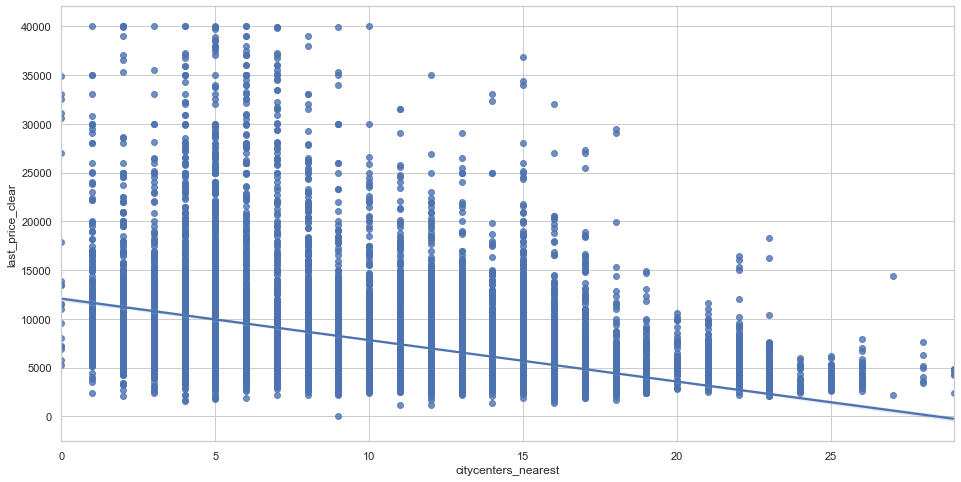

In [201]:
# посмотрим на распределение стоимости в зависимости от расстояния до центра
sns.regplot(x = spb_clear['citycenters_nearest'], y = spb_clear['last_price_clear'])

In [202]:
# сгруппируем данные по расстоянию
spb_group_distance = spb_clear.groupby('citycenters_nearest', as_index=False).last_price_clear.mean()

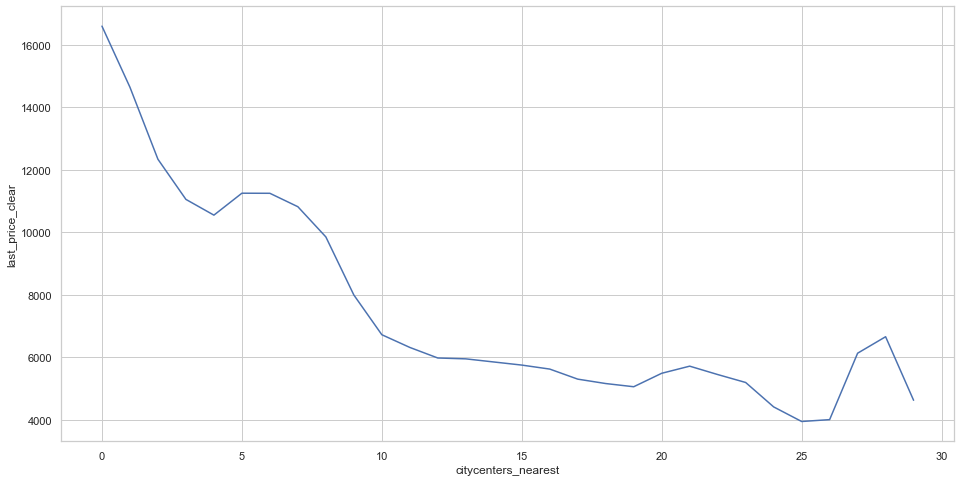

In [203]:
# построим график
sns.lineplot(x = spb_group_distance['citycenters_nearest'],
             y = spb_group_distance['last_price_clear'].rolling(window=2, min_periods=1).mean())

Визуально можно выделить 2 различных участка, которые подчиняются разным законам ценообразования:
* 0-10км    -    центр города
* от 10км   -    окраина

In [204]:
# создадим столбец с категориальными признаком
spb_clear['location_group'] = pd.cut(spb_clear['citycenters_nearest'],
                               [-0.001, 10, 100],
                               labels = ['центр города', 'окраина'])

In [205]:
spb_clear['location_group'].value_counts()

окраина         10226
центр города     5434
Name: location_group, dtype: int64

In [206]:
spb_clear.columns

Index(['citycenters_nearest', 'parks_around3000', 'ponds_around3000',
       'ceiling_height_clear', 'living_area_clear', 'kitchen_area_clear',
       'price_per_m2', 'living_area_per_total', 'days_exposition_clear',
       'total_area_clear', 'rooms_clear', 'last_price_clear',
       'location_group'],
      dtype='object')

In [207]:
# посмотрим на основные показатели двух локаций
spb_clear.groupby('location_group').median().round(2).T

location_group,центр города,окраина
citycenters_nearest,6.00,14.00
parks_around3000,1.00,0.00
ponds_around3000,1.00,0.00
ceiling_height_clear,3.00,2.60
living_area_clear,39.00,29.60
kitchen_area_clear,11.00,9.00
price_per_m2,117.70,100.40
living_area_per_total,0.59,0.56
days_exposition_clear,107.00,84.00
total_area_clear,68.00,49.40


### Выделим сегменты в зависимости от стоимости и площади

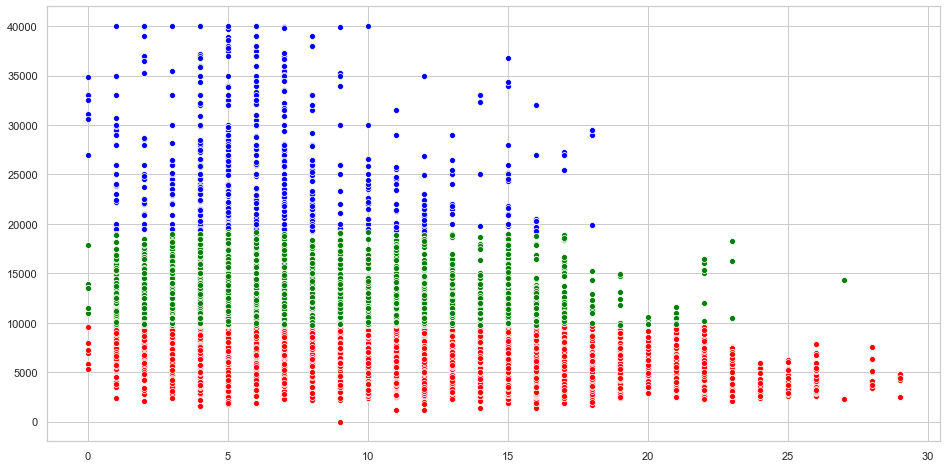

In [208]:
# Построим модель данных
X = spb_clear.loc[(spb_clear['citycenters_nearest'].notna() &
                   spb_clear['last_price_clear'].notna(),
                   ['citycenters_nearest', 'last_price_clear'])].astype('int').values
clustering = AgglomerativeClustering(n_clusters=3).fit(X)

labels = clustering.labels_

sns.scatterplot(X[labels==0, 0], X[labels==0, 1], color='red')
sns.scatterplot(X[labels==1, 0], X[labels==1, 1], color='blue')
sns.scatterplot(X[labels==2, 0], X[labels==2, 1], color='green')

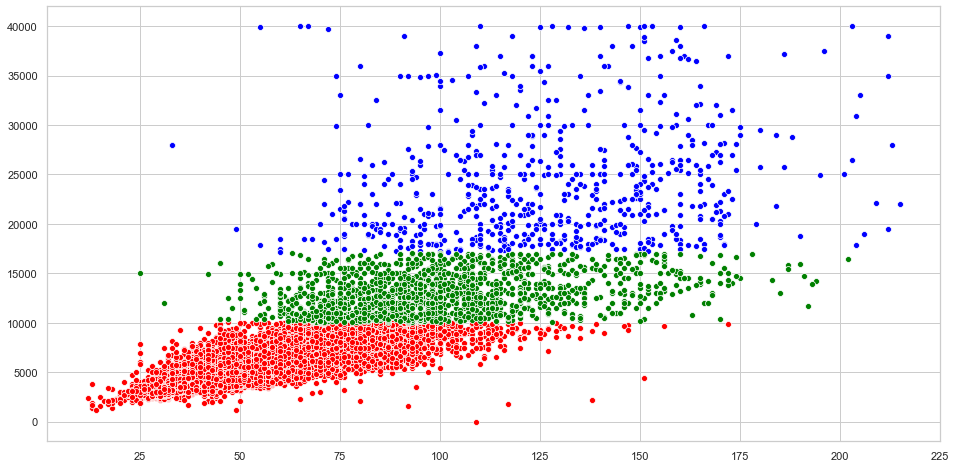

In [209]:
# Построим модель данных
X = spb_clear.loc[(spb_clear['total_area_clear'].notna() &
                   spb_clear['last_price_clear'].notna(),
                   ['total_area_clear', 'last_price_clear'])].astype('int').values

clustering = AgglomerativeClustering(n_clusters=3).fit(X)

labels = clustering.labels_

sns.scatterplot(X[labels==0, 0], X[labels==0, 1], color='red')
sns.scatterplot(X[labels==1, 0], X[labels==1, 1], color='blue')
sns.scatterplot(X[labels==2, 0], X[labels==2, 1], color='green')

Все логично, получается 3 класса:
1. Элитная недвижимость, располагается преимущественно в центре и не имеет четкой зависимости стоимости от площади
2. Эконом и средний класс, рассполагается во всех частях города, 

In [210]:
# создадим столбец с разделением по классам
spb_clear['class'] = pd.cut(spb_clear['last_price_clear'],
                               [-0.001, 10000, 18000, 100000],
                               labels = ['эконом', 'средний', 'элитная'])

In [211]:
# посмотрим на основные показатели в зависимости от класса
spb_clear.groupby('class').median().round(2).T

class,эконом,средний,элитная
citycenters_nearest,13.00,7.00,6.00
parks_around3000,0.00,1.00,1.00
ponds_around3000,0.00,1.00,1.00
ceiling_height_clear,2.65,3.00,3.00
living_area_clear,29.30,54.00,71.00
kitchen_area_clear,9.00,15.00,19.30
price_per_m2,101.20,132.10,174.50
living_area_per_total,0.57,0.57,0.56
days_exposition_clear,85.00,120.00,142.50
total_area_clear,49.40,96.00,128.00


(0.0, 400.0)

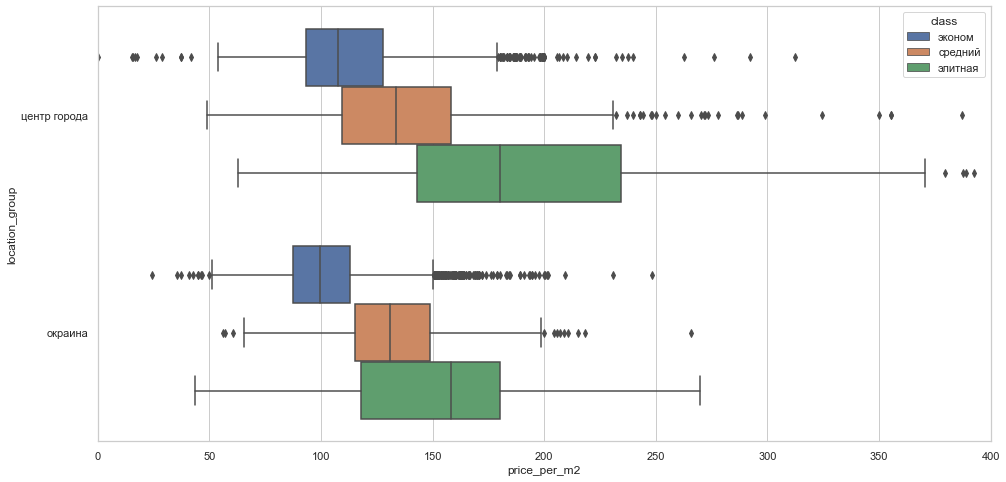

In [212]:
sns.boxplot(data=spb_clear, x='price_per_m2', y='location_group', hue='class', orient="h")
plt.xlim(0, 400)

# Построим модель зависимости стоимости недвижимости от различных характеристик

    Для построения модели, нам необходимо, чтобы отсутствовали пропуска в данных.

In [213]:
# посмотрим на количество пропусков
spb_clear.isna().sum()

citycenters_nearest        61
parks_around3000           61
ponds_around3000           61
ceiling_height_clear     5680
living_area_clear         179
kitchen_area_clear       1429
price_per_m2                0
living_area_per_total     192
days_exposition_clear    3356
total_area_clear          191
rooms_clear                87
last_price_clear          181
location_group             61
class                     181
dtype: int64

    Для того, чтобы у нас было больше данных, избавимся от колонок с большим количеством пропусков, т.е.:
    `ceiling_height_clear`, `kitchen_area_clear` и `days_exposition_clear`.

In [214]:
spb_clear.columns

Index(['citycenters_nearest', 'parks_around3000', 'ponds_around3000',
       'ceiling_height_clear', 'living_area_clear', 'kitchen_area_clear',
       'price_per_m2', 'living_area_per_total', 'days_exposition_clear',
       'total_area_clear', 'rooms_clear', 'last_price_clear', 'location_group',
       'class'],
      dtype='object')

In [215]:
spb_clear_model = spb_clear \
                        .drop(columns = ['ceiling_height_clear', 'kitchen_area_clear','days_exposition_clear']) \
                        .dropna()

In [216]:
# Посмотрим, от какого количества данных мы избавились для подготовки модели
(spb_clear.shape[0] - spb_clear_model.shape[0]) / spb_clear.shape[0]

0.023280961770879714

In [217]:
spb_clear_model_part_1 = spb_clear_model.drop(columns=['location_group', 'class'])

In [218]:
spb_clear_model_part_2 = pd.get_dummies(data = spb_clear_model[['location_group', 'class']], drop_first = True)

In [219]:
spb_clear_model_full = pd.concat([spb_clear_model_part_1, spb_clear_model_part_2], axis = 1).astype('float')

In [220]:
Y = spb_clear_model_full['last_price_clear']
X = spb_clear_model_full.drop(columns=['last_price_clear'])
X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
model = sm.OLS(Y, X)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:       last_price_clear   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 3.510e+04
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:57:07   Log-Likelihood:            -1.2668e+05
No. Observations:               15355   AIC:                         2.534e+05
Df Residuals:                   15343   BIC:                         2.535e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -7035

Мы построили хорошую регрессионную модель с коэф.детерминации = 0,96, что означает, что наша модель описывает 96% изменчивости стоимости квартир, в зависимости от изменения остальных параметров.

# Посмотрим какой из параметров сильнее всего влияет на стоимость жилья

In [221]:
pd.concat([X, Y], axis=1).corr()['last_price_clear'] \
                            .to_frame().abs().query('last_price_clear > 0.1') \
                            .sort_values(by = 'last_price_clear', ascending=False)

,last_price_clear
last_price_clear,1.000000
total_area_clear,0.799934
class_элитная,0.740304
living_area_clear,0.695613
price_per_m2,0.648968
rooms_clear,0.510911
class_средний,0.451197
citycenters_nearest,0.401217
location_group_окраина,0.382872
ponds_around3000,0.215475


    Можно выделить 4 параметра: total_area_clear, class_элитная, living_area_clear, price_per_m2.

<a name="stage_4"></a>
# 4. Результаты исследования.


[Наверх к оглавлению](#contents)

### Результаты:

1. Мы смогли построить модель уравнения линейной регрессии, в которой 96% изменчивости параметров, влияет на формирование стоимости жилья. Таким образом мы можем с большой долей вероятности находить аномалии в данных, в т.ч. для поиска схем мошенничества.

### Выводы:
1. Благодаря предобработке данных и добавлению новых зависимостей на их основе(например класс недвижимости и район города), можно значительно улучшить качество построенных моделей.
2. Внутри центральных районов города, зависимость стоимости недвижимости от расстояния до центра, совсем незначительная. За пределами центра, эта зависимость усиливается.
3. Большая часть изменчивости нашей модели зависит от площади жилья (в т.ч. жил.пл. и кухня) и класса недвижимости, что вполне логично.
4. Для более детального анализа стоимости недвижимости, необходимо также анализировать данные о подключаемых пакетах рекламы. Т.к. вполне возможно, что недвижимость, которую рекламируют, продается быстрее или по более высокой стоимости.